# Project 2: No-Show Appointments Data Analysis

#### By: Lamia Aljoudi ✿

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

<li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li>‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li>Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up</li>

In [2]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# including magic word so visualization are plotted inline
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [3]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### We notice that there are no missing values in this dataset.

In [6]:
for col in df.columns:
    print(col,type(df[col][0]))

PatientId <class 'numpy.float64'>
AppointmentID <class 'numpy.int64'>
Gender <class 'str'>
ScheduledDay <class 'str'>
AppointmentDay <class 'str'>
Age <class 'numpy.int64'>
Neighbourhood <class 'str'>
Scholarship <class 'numpy.int64'>
Hipertension <class 'numpy.int64'>
Diabetes <class 'numpy.int64'>
Alcoholism <class 'numpy.int64'>
Handcap <class 'numpy.int64'>
SMS_received <class 'numpy.int64'>
No-show <class 'str'>


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### • We notice that only about 10% of patients have scholarship.
#### • Average age of patients is around 37 yeasrs old.
#### • Around 32% of patients receive SMS before appointment to confirm booking.

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### We notice that some patients have more that one appointment, and since we are concerned with the appointment itself, we assume that we don't need patient Id and appointment Id, so we will neglect them.

## Data Cleaning
#### Dropping columns (patient ID, Appointment ID, Neighbourhood) >> I think they are not useful.

In [9]:
df.drop(["PatientId", "AppointmentID", "Neighbourhood" ], axis = 1, inplace = True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No


#### Renaming Columns with lower case letters and (_).

In [10]:
df.rename(columns = lambda x : x.strip().lower().replace("-","_"), inplace=True)
df.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No


#### Convert scheduled day and appointment day to date time foramt (instead of string).

In [11]:
df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No


#### Handling missing values.

In [12]:
df[df.isnull().sum(axis=1) > 0].shape

(0, 11)

#### We notice that there are no missing values (null values) in this dataset.

#### Checking for duplicates.

In [13]:
sum(df.duplicated())

722

#### number of duplicated rows = 722 ! So we will drop them.

In [14]:
df.drop_duplicates(inplace = True)
df.shape
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No


#### Converting No_show feature to be boolean (0 or 1) instead of string.

In [15]:
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})
df.head()
#notice that 0 = showed/appeared on the appointment

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,0


#### Let's check different values of different columns.

In [16]:
df.age.value_counts()

 0      3529
 1      2271
 52     1738
 49     1645
 53     1641
        ... 
 115       4
 100       3
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

#### We notice that there is a negative age, so let's drop rows that contain negative age.

In [17]:
negative_age_rows = df[df.age < 0]
df.drop(negative_age_rows.index, inplace=True)
df.age.value_counts()

0      3529
1      2271
52     1738
49     1645
53     1641
       ... 
98        6
115       4
100       3
102       2
99        1
Name: age, Length: 103, dtype: int64

In [18]:
df.scholarship.value_counts()

0    99005
1    10799
Name: scholarship, dtype: int64

In [19]:
df.hipertension.value_counts()

0    88130
1    21674
Name: hipertension, dtype: int64

In [20]:
df.diabetes.value_counts()

0    101911
1      7893
Name: diabetes, dtype: int64

In [21]:
df.alcoholism.value_counts()

0    106460
1      3344
Name: alcoholism, dtype: int64

In [22]:
df.handcap.value_counts()

0    107585
1      2023
2       182
3        11
4         3
Name: handcap, dtype: int64

#### We notice that there are different values for handicaps, which refer to the number of handicaps the patient has, which is not important for us becaues we are only concerned whether the patient is handicapped or not, so we convert it to 0/1 for handicapped or not.

In [23]:
df.loc[df.handcap > 1, 'handcap'] = 1
df.handcap.value_counts()

0    107585
1      2219
Name: handcap, dtype: int64

#### Adding a column that contains days of the week of the appointment.

In [24]:
df["appointmentday_week"] = df.appointmentday.map(lambda x : x.day_name())
df.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentday_week
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,0,Friday


To anser the second question, we need to know the time that the patient wait till the appointment day.

Adding a column for waiting days.

In [25]:
delta = df.appointmentday - df.scheduledday
df["waiting_days"]= delta.abs().dt.days.astype(int)
df.head(10)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointmentday_week,waiting_days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,0,Friday,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,0,Friday,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,0,Friday,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,0,Friday,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,0,Friday,0
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,0,1,0,0,0,0,0,Friday,1
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,1,Friday,1
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,1,Friday,1
8,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,0,0,0,0,0,0,0,Friday,0
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,0,0,0,Friday,1


## Exploratory Data Analysis
## Question 1: 
#### What is the most important factor for us to know in order to predict if a patient will show up for their scheduled appointment?

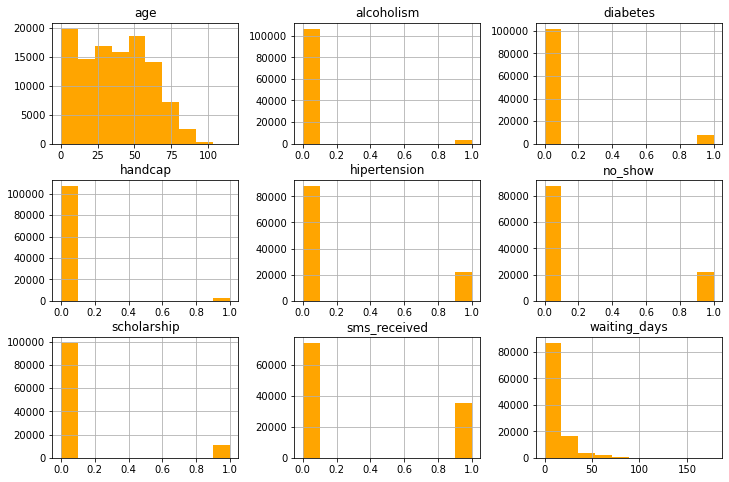

In [37]:
df.hist(figsize=(12,8), color='orange');

#### Some conclusions from these histograms:
1. Most patients are below 65 years old.

2. Most patients don't suffer from alcoholism, diabetes, handcap or hipertension.

3. Most patients show on appointment.

4. Most patients don't have a scholarship.

5. Most patients didn't recieve a sms to confirm booking or remind them.

6. Most petients didn't wait more than 15 days before appointment.

=> From these histograms we can conclude that: age, sms and waiting days are the most important factors and the 3 independent factors to show or no show on the appointment (they have the most variety histograms distributions)

#### Now we will look at each variable and its relation with no_show column

#### Gender

In [28]:
#mean of patients who no-showed of each gender
df.groupby("gender").no_show.mean()

gender
F    0.202373
M    0.197938
Name: no_show, dtype: float64

In [29]:
matrix =pd.crosstab(df["gender"],df['no_show'])
matrix

no_show,0,1
gender,,
F,56941,14447
M,30812,7604


In [30]:
matrix.div(matrix.sum(1).astype(float), axis=0)

no_show,0,1
gender,,
F,0.797627,0.202373
M,0.802062,0.197938


Text(0, 0.5, 'no_show')

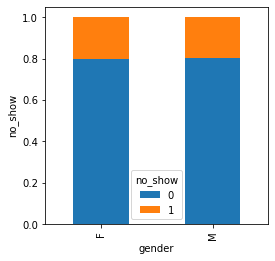

In [31]:
matrix.div(matrix.sum(1).astype(float), axis=0).plot(kind="bar",  stacked=True, figsize=(4,4));
plt.ylabel("no_show")

#### We notice that around 0.2 of patients of each gender doesn't show on appointments. So the gender is not so much important.

#### Age

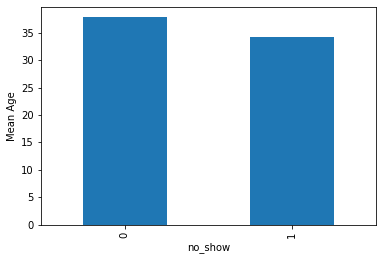

In [32]:
df.groupby("no_show").age.mean().plot.bar();
plt.ylabel('Mean Age');

#### We notice that mean age of people who didn't show is less than who show on appointment.

#### SMS

In [33]:
matrix_sms =pd.crosstab(df["sms_received"],df['no_show'])
matrix_sms.div(matrix_sms.sum(1).astype(float), axis=0)

no_show,0,1
sms_received,,
0,0.834925,0.165075
1,0.724295,0.275705


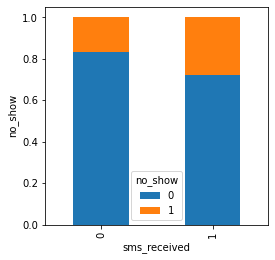

In [34]:
matrix_sms.div(matrix_sms.sum(1).astype(float), axis=0).plot(kind="bar",stacked= True, figsize=(4,4));
plt.ylabel("no_show");

#### We conclude that: sms is not a big factor of showing on appointment as percentage of people who did not received a sms and attended the appointment is bigger than percentage of people who received a sms and attended on time!

#### Waiting days

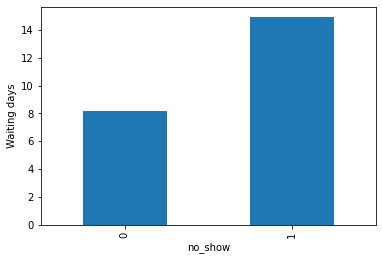

In [35]:
df.groupby("no_show").waiting_days.mean().plot.bar();
plt.ylabel('Waiting days');

#### Waiting days is an important factor of showing on appointment, we see that the mean waiting days of people who attended the appointment is less that who didn't attend it. So fewer waiting days means bigger chance of attending the appointment. I think it's the most important factor of showing or no showing on the appointment.

#### Alcoholism

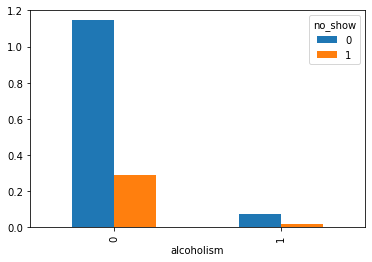

In [38]:
#alcoholism
matrix_alcoholism =pd.crosstab(df["alcoholism"],df['no_show'])
matrix_alcoholism.div(matrix_sms.sum(1).astype(float), axis=0).plot.bar();

## Conclusions
1. Mean age of people who didn't show is less than who show on appointment.

2. Most patients didn't receive a message as a reminder.

3. Average waiting days is 15 days before appointment day.

4. 5% only of patients who booked on the same day didn't show on appointment.

## Limitations
1. Number of sms the patient receive is not mentioned, so we don't know how many messages do he need to make him show on appointment.
2. There are several diseases not mentioned.

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295